In [65]:
from tensorflow.keras.layers import Dense,Flatten,Input
from keras import activations
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob

In [66]:
train_path="/content/drive/MyDrive/cotton_plant disease pred CNN/train"
val_path="/content/drive/MyDrive/cotton_plant disease pred CNN/val"

In [67]:
Img_size=[256,256]

In [68]:
m=InceptionV3(input_shape=Img_size+[3],weights='imagenet',include_top=False)

In [69]:
for layer in m.layers:
  layer.trainable=False

In [70]:
folders=glob("/content/drive/MyDrive/cotton_plant disease pred CNN/train/*")

In [71]:
x=Flatten()(m.output)
x=Dense(128,activation='relu')(x)
pred=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=m.input,outputs=pred)

In [72]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_564 (Conv2D)         (None, 127, 127, 32)         864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_564 (B  (None, 127, 127, 32)         96        ['conv2d_564[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 127, 127, 32)         0         ['batch_normalization_56

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen_data=ImageDataGenerator(rescale=1/255,shear_range=.2,zoom_range=.2,horizontal_flip=True)
test_gen_data=ImageDataGenerator(rescale=1/255)

In [74]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
training_set=train_gen_data.flow_from_directory("/content/drive/MyDrive/cotton_plant disease pred CNN/train",target_size=(256,256),batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [76]:
testing_set=test_gen_data.flow_from_directory("/content/drive/MyDrive/cotton_plant disease pred CNN/val",target_size=(256,256),batch_size=32,class_mode='categorical')

Found 324 images belonging to 4 classes.


In [77]:
result=model.fit_generator(training_set,
                           validation_data=testing_set,
                           epochs=20,
                           )

<ipython-input-77-90973ffa2afe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(training_set,


Epoch 1/20
61/61 [==============================] - 50s 700ms/step - loss: 6.3867 - accuracy: 0.6381 - val_loss: 0.9403 - val_accuracy: 0.7130
Epoch 2/20
61/61 [==============================] - 41s 678ms/step - loss: 0.4427 - accuracy: 0.8765 - val_loss: 0.6733 - val_accuracy: 0.8395
Epoch 3/20
61/61 [==============================] - 42s 686ms/step - loss: 0.3968 - accuracy: 0.9031 - val_loss: 0.4023 - val_accuracy: 0.8704
Epoch 4/20
61/61 [==============================] - 42s 693ms/step - loss: 0.2109 - accuracy: 0.9303 - val_loss: 0.2423 - val_accuracy: 0.9259
Epoch 5/20
61/61 [==============================] - 41s 680ms/step - loss: 0.1989 - accuracy: 0.9436 - val_loss: 0.2852 - val_accuracy: 0.8951
Epoch 6/20
61/61 [==============================] - 42s 682ms/step - loss: 0.2340 - accuracy: 0.9385 - val_loss: 0.3297 - val_accuracy: 0.9167
Epoch 7/20
61/61 [==============================] - 42s 695ms/step - loss: 0.2178 - accuracy: 0.9385 - val_loss: 0.2062 - val_accuracy: 0.9259

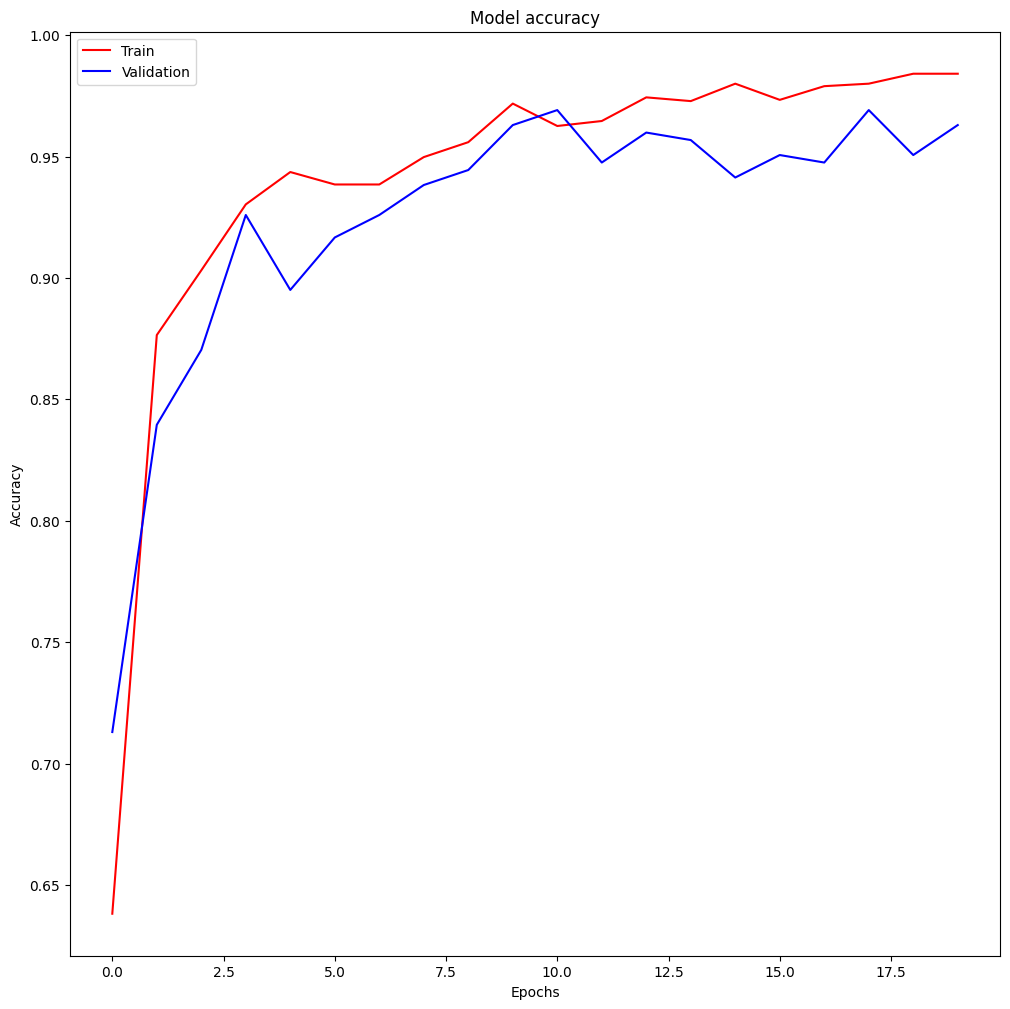

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(result.history['accuracy'], color='r')
plt.plot(result.history['val_accuracy'], color='b')
plt.title("Model accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()